In [1]:
# READING IMAGE #
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

# image1 = mpimg.imread('./camera_cal/calibration1.jpg')
# image2 = mpimg.imread('./camera_cal/calibration2.jpg')
# f, (ax1,ax2) = plt.subplots(1,2,figsize=(24,9))
# f.tight_layout()
# ax1.imshow(image1)
# ax2.imshow(image2)
# plt.subplots_adjust(left=0.,right=1,top=0.9,bottom=0.)
# # print(image.shape)

## CALIBRATION

In [2]:
import numpy as np
import cv2
import glob
#Finding object points and image points
nx = 9
ny = 6
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

objpoints = []
imgpoints = []
images = glob.glob('./camera_cal/calibration*.jpg')
for name in images:
    img = mpimg.imread(name)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray,(nx, ny),None)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

In [3]:
print(np.array(objpoints).shape)
print(np.array(imgpoints[0][0]))

(17, 54, 3)
[[ 545.32281494  343.05032349]]


In [4]:
def graycvt(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

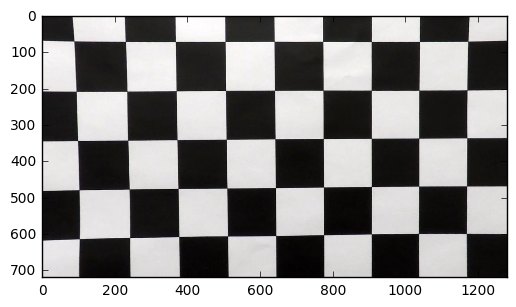

In [5]:
#Undistort a calibration image
ca1 = mpimg.imread('./camera_cal/calibration1.jpg')
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,graycvt(ca1).shape[::-1],None,None)

undistort_ca1 = cv2.undistort(ca1,mtx,dist,None,mtx)
plt.imshow(undistort_ca1)

        

In [11]:
def undistort(image_path):
    image = mpimg.imread(image_path)
    return cv2.undistort(image,mtx,dist,None,mtx)

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0,255)):
    gray = graycvt(img)
    if orient == 'x':
        sobel = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    elif orient == 'y':
        sobel = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0])&(scaled_sobel <= thresh[1])] = 1
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0,255)):
    gray = graycvt(image)
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    abs_sobelxy = np.sqrt(sobelx**2+sobely**2)
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    mag_binary = np.zeros_like(scaled_sobel)
    mag_binary[(scaled_sobel >= mag_thresh[0])&(scaled_sobel <= mag_thresh[1])]=1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = graycvt(image)
    abs_sobelx = np.absolute(cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel))
    abs_sobely = np.absolute(cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel))
    grad_dir = np.arctan2(abs_sobely,abs_sobelx)
    dir_binary = np.zeros_like(grad_dir)
    dir_binary[(grad_dir >= thresh[0])&(grad_dir <= thresh[1])] = 1
    return dir_binary

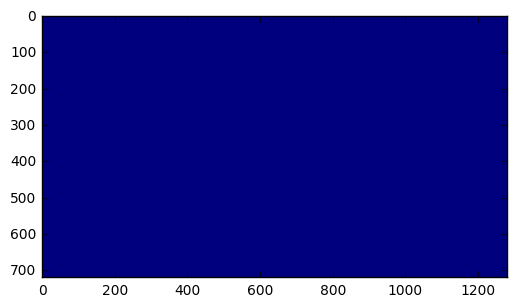

In [16]:
#Sample
img1 = './test_images/straight_lines1.jpg'
undist = undistort(img1)
output = dir_threshold(undist, sobel_kernel=9, thresh=(0,3.14))
plt.imshow(output)